In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
import matplotlib.patches as patches

In [2]:
def analytic_solution(A,B,omega,t):
    
    return [A*np.sin(omega*t)+B*np.cos(omega*t),omega*A*np.cos(omega*t)-omega*B*np.sin(omega*t)]

In [3]:
def Forward_Euler_approximation(q_initial,p_initial,delta,omega,num_iteration):
    
    initial_condition = np.array([q_initial,p_initial])
    evolution_map = np.array([[1,delta],[-delta*omega**2,1]])
    output = np.dot(np.linalg.matrix_power(evolution_map, num_iteration), initial_condition)
    
    return output

Text(0.5, 1.0, 'total momentum error vs delta')

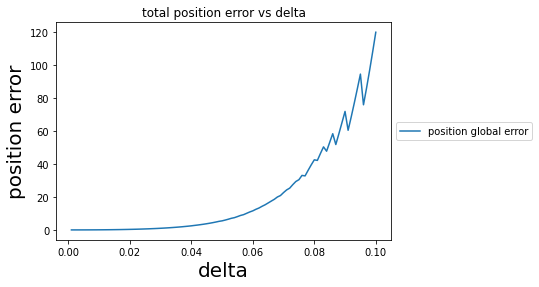

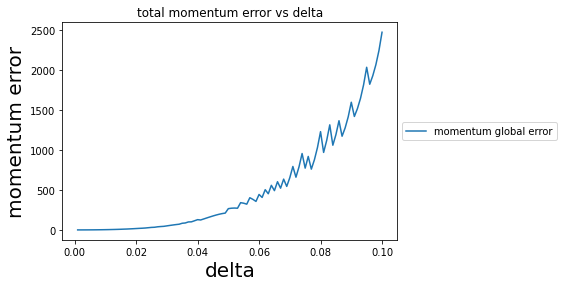

In [4]:
delta_list = np.linspace(0.001,0.1,100)

global_error_x = []
global_error_p = []
for delta in delta_list:
    
    end_time = 2
    n_end = int((end_time/delta))
    tt = np.arange(0.0, end_time, delta)
    ana_sol_1 = np.asarray([analytic_solution(1.0,1.0,2.0*np.pi,t) for t in np.arange(0.0, end_time, delta)])
    euler_approx = np.asarray([Forward_Euler_approximation(ana_sol_1[0][0],ana_sol_1[0][1],delta,2.0*np.pi,n) for n in range(0,n_end,1) ])
    if len(ana_sol_1)<len(euler_approx):
        euler_approx = euler_approx[:-1]
        global_error_x.append(np.sum((ana_sol_1[:,0] - euler_approx[:,0]) ** 2)/len(ana_sol_1))
        global_error_p.append(np.sum((ana_sol_1[:,1] - euler_approx[:,1] )** 2)/len(ana_sol_1))
    elif len(ana_sol_1)>len(euler_approx):     
        ana_sol_1 = ana_sol_1[:-1]
        global_error_x.append(np.sum((ana_sol_1[:,0] - euler_approx[:,0]) ** 2)/len(ana_sol_1))
        global_error_p.append(np.sum((ana_sol_1[:,1] - euler_approx[:,1] )** 2)/len(ana_sol_1))
    else:
        global_error_x.append(np.sum((ana_sol_1[:,0] - euler_approx[:,0]) ** 2)/len(ana_sol_1))
        global_error_p.append(np.sum((ana_sol_1[:,1] - euler_approx[:,1] )** 2)/len(ana_sol_1))

    
#plot position
fig, axes = plt.subplots(1,1)

axes.plot(delta_list,global_error_x,label='position global error')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_xlabel(f'delta', fontsize=20)
axes.set_ylabel(f'position error', fontsize=20);
plt.title(f'total position error vs delta')

#plot momentum
fig, axes = plt.subplots(1,1)

axes.plot(delta_list,global_error_p,label='momentum global error')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_xlabel(f'delta', fontsize=20)
axes.set_ylabel(f'momentum error', fontsize=20);
plt.title(f'total momentum error vs delta')

In [5]:
from scipy.optimize import curve_fit

In [6]:
# define the power law function to fit
def power_law(x, a, b, c):
    return a * x ** int(b) + c

In [7]:
# fit the data using curve_fit
params_position, cov_position = curve_fit(power_law, np.log(delta_list), np.log(global_error_x),p0=[2.5, 1.0, 9],maxfev=10000)
params_momentum, cov_position = curve_fit(power_law, np.log(delta_list), np.log(global_error_p),p0=[2.5, 1.0, 9],maxfev=10000)

/Users/gaojiayang/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [8]:
fitting_position = power_law(np.log(delta_list),params_position[0],params_position[1],params_position[2])
fitting_momentum = power_law(np.log(delta_list),params_momentum[0],params_momentum[1],params_momentum[2])

Text(0.5, 1.0, 'log scale total position error vs delta')

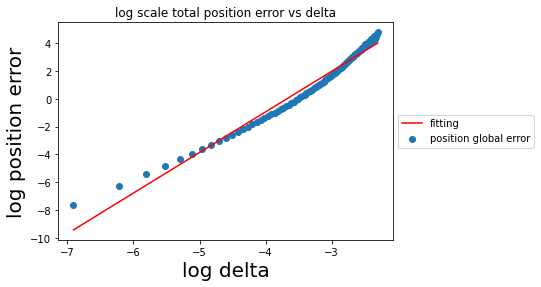

In [9]:
# check your previous prediction.
#plot log position
fig, axes = plt.subplots(1,1)

axes.scatter(np.log(delta_list),np.log(global_error_x),label='position global error')
axes.plot(np.log(delta_list),fitting_position,label='fitting',color = 'r')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_xlabel(f'log delta', fontsize=20)
axes.set_ylabel(f'log position error', fontsize=20);
plt.title(f'log scale total position error vs delta')

Text(0.5, 1.0, 'log scale total momentum error vs delta')

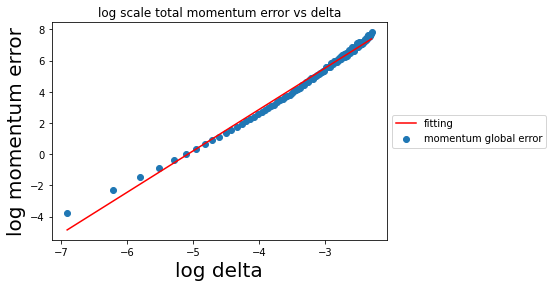

In [10]:
# check your previous prediction.
#plot log position
fig, axes = plt.subplots(1,1)

axes.scatter(np.log(delta_list),np.log(global_error_p),label='momentum global error')
axes.plot(np.log(delta_list),fitting_momentum,label='fitting',color = 'r')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_xlabel(f'log delta', fontsize=20)
axes.set_ylabel(f'log momentum error', fontsize=20);
plt.title(f'log scale total momentum error vs delta')

In [11]:
# extract the power and amplitude from the fit parameters
power_position = params_position[0]
power_momentum = params_momentum[0]


print(f"The power of the position data is {power_position:.2f}")
print(f"The power of the momentum data is {power_momentum:.2f}")

The power of the position data is 2.92
The power of the momentum data is 2.66
